---
### **3. geopandas basic**
- geopandas 공식 사이트 (https://geopandas.org/en/stable/docs/user_guide.html) 

In [2]:
### library
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.plotting as plotting
import warnings

warnings.filterwarnings('ignore')

---
#### **3-1. shp파일, geojson파일 load**
- `gpd.read_file(path)`
    - shp파일은 cpg,dbf,prj,shx까지 5개가 하나의 파일이다.
    - 하지만, geojson은 1개가 하나의 파일이다.
- 데이터 설명 
    - tasu_station_inf.shp : 대전 타슈(공공자전거) 정류장 위치 정보 데이터 
    - HangJeongDong.geojson : 대한민국의 행정동 geometry 데이터

In [3]:
### data load
tasu_station = gpd.read_file('./data/Lecture3/tasu_station_inf.shp')
HJD = gpd.read_file('./data/Lecture3/HangJeongDong.geojson')

In [4]:
### HJD에서 대전만 추출하여 daejeon_HJD으로 저장 
daejeon_HJD = HJD.loc[(HJD['sidonm'] == '대전광역시')].reset_index(drop=True)

In [4]:
tasu_station.head()

ID         stationNam  holder       address                    geometry
0   1     무역전시관입구(택시승강장)      14       도룡동 3-8  POINT (127.38613 36.37458)
1   2            대전컨벤션센터      20      도룡동 4-19  POINT (127.39238 36.37439)
2   3             한밭수목원1      19       만년동 396  POINT (127.38845 36.36908)
3   4  초원아파트(104동 버스정류장)      12       만년동 401  POINT (127.37930 36.36794)
4   5    둔산대공원 입구(버스정류장)      13  둔산2동 1521-10  POINT (127.38886 36.36497)

In [5]:
daejeon_HJD.head()

OBJECTID         adm_nm   adm_cd     adm_cd2    sgg sido sidonm     temp  \
0      1008    대전광역시 동구 효동  2501053  3011053000  30110   30  대전광역시    동구 효동   
1      1009  대전광역시 동구 판암1동  2501055  3011055100  30110   30  대전광역시  동구 판암1동   
2      1010  대전광역시 동구 판암2동  2501056  3011055200  30110   30  대전광역시  동구 판암2동   
3      1011   대전광역시 동구 용운동  2501057  3011056000  30110   30  대전광역시   동구 용운동   
4      1012   대전광역시 동구 자양동  2501060  3011059000  30110   30  대전광역시   동구 자양동   

  sggnm   adm_cd8                                           geometry  
0    동구  25010530  MULTIPOLYGON (((127.44846 36.31925, 127.44832 ...  
1    동구  25010550  MULTIPOLYGON (((127.48100 36.30044, 127.47953 ...  
2    동구  25010560  MULTIPOLYGON (((127.46267 36.32155, 127.46126 ...  
3    동구  25010570  MULTIPOLYGON (((127.47077 36.32950, 127.47066 ...  
4    동구  25010600  MULTIPOLYGON (((127.45699 36.34388, 127.45630 ...

<Figure size 800x600 with 0 Axes>

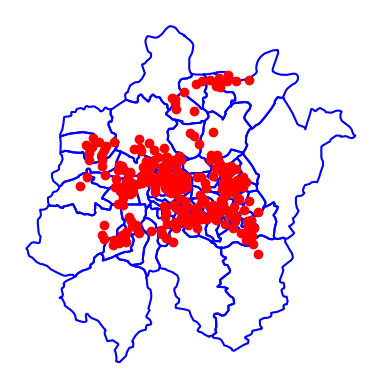

In [6]:
### tasu_station, HJD 간단 시각화
plt.figure(figsize=(8,6))

fig, ax = plt.subplots()
for geo in daejeon_HJD['geometry']:
    for g in geo.geoms:
        x, y = g.exterior.xy
        ax.plot(x, y, color='blue')
        
plotting.plot_points(tasu_station['geometry'], color='red')
plt.axis('off')
plt.show()

---
#### **3-2. CRS**
- **crs란?** 데이터의 좌표 체계를 나타내는 것이다. 
    - `geo_data.crs`
    - EPSG : 5174 ( meter 좌표계 )
        - *buffer, area와 같은 함수를 사용시 meter 좌표계로 변환하여 사용하여야 한다.
        - meter 좌표계는 5174 뿐만 아니라, [5181, 5186, 5182]등의 여러가지 좌표계가 있다. 
    - EPSG : 4326 ( 평소 실생활에서 보이는 좌표계 ex.[36.xxx,127.xxx] )
- **crs 변경**
    - `geo_data.to_crs(4236)` 4236 좌표계로 변경 
    - 위에 함수를 사용하기 위해서는 data의 좌표계가 설정되어 있는 상태이여야 한다. 
<br></br>
- 좌표계는 데이터 생성 주체에 따라 다르기 때문에, 데이터 사용 설명서 등을 참고하여 원하는 좌표계로 변환하여 사용해야 한다.
<br></br>
<br></br>

- **crs(좌표계) 확인**

In [7]:
# - 'shp', 'geojson' 같은 경우 geopandas로 불러오면, crs가 설정되어 있다.
# - 하지만 'csv', 'excel'과 같은 파일 형식으로 geometry가 표현되어 있는 경우. geopandas 함수를 이용하기 위해 crs를 설정해주어야 된다. 
# - crs 설정은 보통 데이터 수집 명세서와 같은 파일에 명시 되어 있다.

daejeon_HJD.crs # (EPSG:4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- **crs(좌표계) 변경**

In [8]:
# - 분석에 필요한 좌표계로 변경 하기 위해 필요함.
# - distance와 area를  EPSG:4326 상태로 구하면 유클리드 거리를 기준으로 표시 되기 때문에, meter 좌표계로 변환 후 사용해주어야 한다. 

daejeon_HJD_5174 = daejeon_HJD.to_crs(5174) # (EPSG:4326 -> EPSG:5174로 변경)

In [9]:
### crs(좌표계) 변경 비교 확인

print('=EPSG:4326=')
display(daejeon_HJD[['geometry']].head(2))
print('-' * 20)
print('=EPSG:5174=')
display(daejeon_HJD_5174[['geometry']].head(2))

=EPSG:4326=


geometry
0  MULTIPOLYGON (((127.44846 36.31925, 127.44832 ...
1  MULTIPOLYGON (((127.48100 36.30044, 127.47953 ...

--------------------
=EPSG:5174=


geometry
0  MULTIPOLYGON (((240200.147 313255.542, 240187....
1  MULTIPOLYGON (((243132.019 311182.966, 243000....

---
#### **3-3. area**
- `geo_data.area`를 적용하면, polygon의 공간의 넓이를 구할 수 있다. 
- 이때, 좌표계는 meter 좌표계이여야 meter 단위의 넓이를 받을 수 있다. 
- 반환 단위는 meter이기 때문에, km2 단위로 보고 싶으면 반환 값에 1000**2를 나눠주면 된다. (10000000meter -> 10km2)
<br></br>
- 대전광역시 동구 면적 area로 구하기
<br></br>
![alt text](./notebook_image/Lecture2/동구면적_캡처.PNG)

In [10]:
'''geo_data.area'''
# - daejeon_HJD_5174에 area 적용
daejeon_HJD_5174['geometry'].head().area / (1000**2) 

0    2.083155
1    6.032591
2    0.760335
3    3.497629
4    1.159430
dtype: float64

In [11]:
### 대전광역시 동구 면적 구하기

# 동구 filter 
display(daejeon_HJD_5174.loc[(daejeon_HJD_5174['sggnm'] == '동구')].head(2))
# 동구 면적 구하기
print('-' * 20)
print(f'대전광역시 동구 면적 : {sum(daejeon_HJD_5174.loc[(daejeon_HJD_5174["sggnm"] == "동구")].area) / (1000**2):.0f} km2')

OBJECTID         adm_nm   adm_cd     adm_cd2    sgg sido sidonm     temp  \
0      1008    대전광역시 동구 효동  2501053  3011053000  30110   30  대전광역시    동구 효동   
1      1009  대전광역시 동구 판암1동  2501055  3011055100  30110   30  대전광역시  동구 판암1동   

  sggnm   adm_cd8                                           geometry  
0    동구  25010530  MULTIPOLYGON (((240200.147 313255.542, 240187....  
1    동구  25010550  MULTIPOLYGON (((243132.019 311182.966, 243000....

--------------------
대전광역시 동구 면적 : 136 km2


---
#### **3-4. distance**
- 비교하는 공간 데이터의 최단 거리를 반환한다.
- area와 마찬가지로 ESPG:4236 일때, 적용하면 유클리드 거리를 계산하기 때문에 meter 단위 반환값을 얻고 싶으면 meter 좌표계로 변환 후 사용해야 된다.
- `geo_data1.distance(geo_data2)`
    <br></br>
    1. *GeoSeries-geometry*
        <br></br>
        ![alt text](./notebook_image/Lecture2/distance_1.PNG)
        <br></br>
    2. *GeoSeries-GeoSeries (align=True)* : 두 데이터 간 동일한 index에 1 대 1 매칭되는 geometry 끼리 계산
        <br></br>
        ![alt text](./notebook_image/Lecture2/distance_2.PNG)
        <br></br>
    3. *GeoSeries-GeoSeries (align=False)* : 두 데이터 간 동일한 index를 무시하고(행 순서 기준), 1 대 1 매칭되는 geometry 끼리 계산
        <br></br>
        ![alt text](./notebook_image/Lecture2/distance_3.PNG)
        <br></br>

In [12]:
# meter 거리를 반환 받기 위해 tasu_station를 meter 좌표계로 변환
tasu_station_5174 = tasu_station.to_crs(5174)

**1. GeoSeries-geometry**

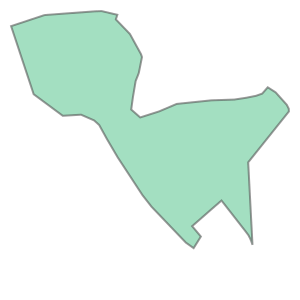

In [13]:
daejeon_HJD_5174['geometry'].iloc[0]

In [14]:
tasu_station_5174.distance(daejeon_HJD_5174['geometry'].iloc[0])

0       7784.077782
1       7444.383992
2       7173.696503
3       7618.578260
4       6798.316005
           ...     
256    11727.411224
257    10330.375360
258    10489.682302
259     5139.073647
260     9552.762735
Length: 261, dtype: float64

**2 . GeoSeries-GeoSeries (align=True)**

In [15]:
### Point(점)과 Point(점)의 거리를 계산
# - random하게 tasu_station 행 순서 섞은 데이터 생성
tasu_station_5174_shuffle = tasu_station_5174.sample(frac=1)

In [16]:
display(tasu_station_5174.head(), tasu_station_5174_shuffle.head())

ID         stationNam  holder       address                       geometry
0   1     무역전시관입구(택시승강장)      14       도룡동 3-8  POINT (234578.245 319371.457)
1   2            대전컨벤션센터      20      도룡동 4-19  POINT (235138.646 319352.512)
2   3             한밭수목원1      19       만년동 396  POINT (234788.876 318762.412)
3   4  초원아파트(104동 버스정류장)      12       만년동 401  POINT (233968.313 318632.771)
4   5    둔산대공원 입구(버스정류장)      13  둔산2동 1521-10  POINT (234827.051 318306.482)

ID     stationNam  holder    address                       geometry
22    23        카이스트 정문      14  구성동 284-4  POINT (232586.453 318430.508)
151  152  대전역(대한통운 맞은편)      12   정동 15-23  POINT (238720.161 314688.270)
251  252      대전정부청사 남문      15   둔산동 1517  POINT (234495.438 317716.246)
81    82        선비마을5단지      12    송촌동 510  POINT (239853.819 318445.939)
50    51      남선공원종합체육관      10   탄방동 1458  POINT (235716.245 316503.626)

In [17]:
# align = True는 index 번호별 1대1 매칭하여, 거리를 구하기 때문에 전부 0를 출력
tasu_station_5174.distance(tasu_station_5174_shuffle, align=True)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
256    0.0
257    0.0
258    0.0
259    0.0
260    0.0
Length: 261, dtype: float64

**3. GeoSeries-GeoSeries (align=False)**

In [18]:
# align = False는 index 번호별를 무시하고 행 순서를 기준으로 1대1 매칭하여, 거리를 구함
tasu_station_5174.distance(tasu_station_5174_shuffle, align=False)

0      2202.866860
1      5880.680177
2      1086.539938
3      5888.471112
4      2010.212687
          ...     
256    9753.051069
257    3041.838668
258    3997.202678
259    6783.152152
260    6543.980395
Length: 261, dtype: float64

---
#### **3-5. convex_hull, envelope, simplify, buffer, unary_union**
1. `unary_union` : 겹치거나, 인접한 지리 데이터를 하나의 geometry로 병합
2. `convex_hull` : 둘러싸는 가장 작은 다각형을 반환  
3. `envelope` : 둘러싸는 최소 사각형을 반환 
4. `simplify` : 전체 모양을 적당히 유지하면서 복잡한 선을 단순화하여 반환, 지리 데이터의 복잡성을 줄여줌 
    - *parameter*
        - tolerance : input값은 meter를 나타내며, tolerance=100이면 100m 이하의 선들은 단순화 된다는 뜻이다.
    - tolerance 파라미터를 사용하기 위해 meter 좌표계 데이터를 사용
5.  `buffer` : 주어진 점 또는 지리 데이터의 주변에 버퍼 영역을 생성하여 반환 
    - *parameter* 
        - distance : buffer 생성 반경 범위
        - resolution : 생성되는 buffer의 해상도를 의미한다. 값이 작으면, 단순화된 buffuer가 생성된다.(default=16)
    - distance 파라미터에 meter 반경을 전달하기 위해서는 meter 좌표계 데이터를 사용
<br></br>
<br></br>

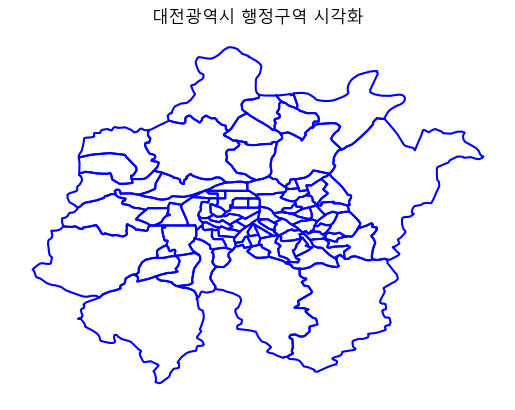

In [19]:
### tasu_station, HJD 간단 시각화
plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()
for geo in daejeon_HJD['geometry']:
    for g in geo.geoms:
        x, y = g.exterior.xy
        ax.plot(x, y, color='blue')
        
plt.title('대전광역시 행정구역 시각화')
plt.axis('off')
plt.show()

1. **unary_union**

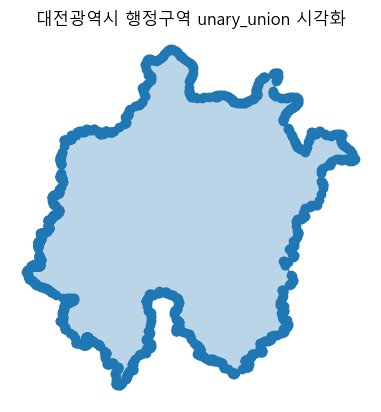

In [20]:
plotting.plot_polygon(daejeon_HJD.geometry.unary_union)
plt.title('대전광역시 행정구역 unary_union 시각화')
plt.axis('off')
plt.show()

2. **convex hull**

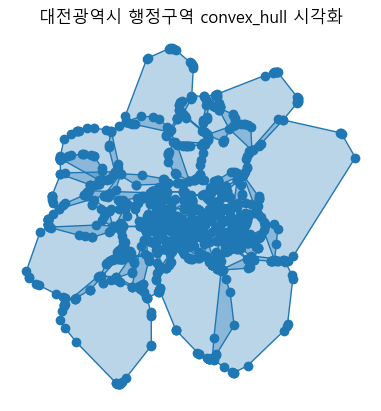

In [21]:
for i in daejeon_HJD.geometry.convex_hull:
    plotting.plot_polygon(i)
    
plt.title('대전광역시 행정구역 convex_hull 시각화')
plt.axis('off')
plt.show()

3. **envelope**

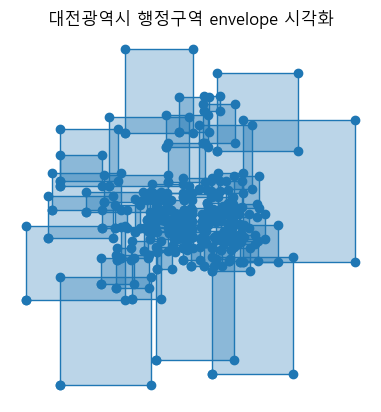

In [22]:
for i in daejeon_HJD.geometry.envelope:
    plotting.plot_polygon(i)
    
plt.title('대전광역시 행정구역 envelope 시각화')
plt.axis('off')
plt.show()

4. **simplify**

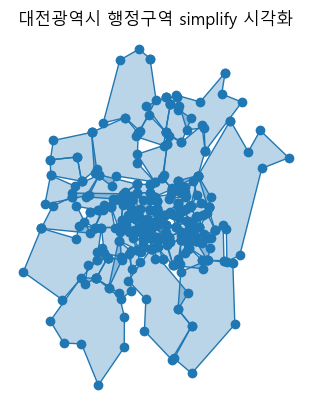

In [23]:
# tolerance=1000 -> 1000 meter 이하 선들 단순화
for i in daejeon_HJD_5174.geometry.simplify(tolerance=1000):
    plotting.plot_polygon(i)
    
plt.title('대전광역시 행정구역 simplify 시각화')
plt.axis('off')
plt.show()

5. **buffer**

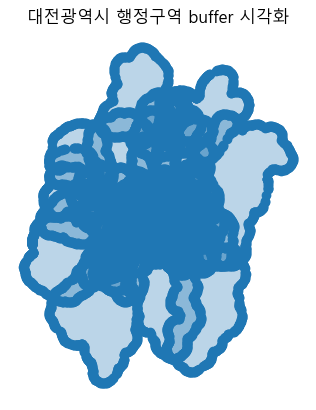

In [24]:
# distance=1000 -> 1000 meter의 외곽선 buffer 만들기
for i in daejeon_HJD_5174.geometry.buffer(distance=1000):
    plotting.plot_polygon(i)
    
plt.title('대전광역시 행정구역 buffer 시각화')
plt.axis('off')
plt.show()

---
#### **3-6. sjoin**
- 공간 관계를 기반으로 두 GeoDataFrame 간에 공간 조인 작업을 수행하는 것입니다.
- sjoin의 주요한 paramter는 '*how*', '*predicate*'가 있다.
    - *how*
        - pandas merge의 how랑 똑같은 역할을 하며, 'left', 'right', 'inner'가 있다. (default 값은 'inner')
    - *predicate*
        - predicate는 공간 조인 작업 시 비교하는 공간의 조인 조건을 명시하는 것이며, 종류는 앞서 Lecture 0 에서 배운 'intersects', 'contains', 'within', 'crosses' 등이 있다. (default 값은 'intersects')
- 당연히, sjoin시 조인 작업이 수행되는 두 데이터는 crs가 같아야 한다. 

In [43]:
### tasu_station과 daejeon_HJD의 sjoin 예시
daejeon_tasu_count = gpd.sjoin(daejeon_HJD, tasu_station, how='inner', predicate='intersects')
daejeon_tasu_count_dict = daejeon_tasu_count.value_counts('temp').to_dict()
daejeon_HJD['tasuStation_count'] = [daejeon_tasu_count_dict[i] if i in daejeon_tasu_count_dict.keys() else 0 for i in daejeon_HJD['temp']]

In [45]:
# 위와 같이 sjoin을 사용하여, geometry 앞에 point가 들어가 있는지 확인하여 행정동 별 타슈 정류장의 갯수를 셀 수 있다.
daejeon_HJD.head(3)

OBJECTID         adm_nm   adm_cd     adm_cd2    sgg sido sidonm     temp  \
0      1008    대전광역시 동구 효동  2501053  3011053000  30110   30  대전광역시    동구 효동   
1      1009  대전광역시 동구 판암1동  2501055  3011055100  30110   30  대전광역시  동구 판암1동   
2      1010  대전광역시 동구 판암2동  2501056  3011055200  30110   30  대전광역시  동구 판암2동   

  sggnm   adm_cd8                                           geometry  \
0    동구  25010530  MULTIPOLYGON (((127.44846 36.31925, 127.44832 ...   
1    동구  25010550  MULTIPOLYGON (((127.48100 36.30044, 127.47953 ...   
2    동구  25010560  MULTIPOLYGON (((127.46267 36.32155, 127.46126 ...   

   tasuStation_count  
0                  6  
1                  3  
2                  0

---